<a href="https://colab.research.google.com/github/sathamhussain7/car-price-prediction/blob/main/Car_price_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision tree regressor

import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,accuracy_score
from sklearn import tree 

load the data

In [ ]:
df=pd.read_csv('/content/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df.shape

(205, 26)

cleaning the data

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.isnull().values.any().sum()

0

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().values.any().sum()

0

In [ ]:
df.duplicated().sum()

0

In [ ]:
df=df.drop(['car_ID'],axis=1)

In [ ]:
df=df.drop(['CarName'],axis=1)

KeyError: ignored

In [ ]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


encoding the data

In [ ]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [ ]:
df['fueltype']=df['fueltype'].map({'gas':0,'diesel':1})

In [ ]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [ ]:
df['aspiration']=df['aspiration'].map({'std':0,'turbo':1})

In [ ]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [ ]:
df['doornumber']=df['doornumber'].map({'four':4,'two':2})

In [ ]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
df['cylindernumber']=df['cylindernumber'].map({'four':4,'two':2,'three':3,'five':5,'six':6,'eight':8,'twelve':12})

In [ ]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [ ]:
df['enginelocation']=df['enginelocation'].map({'front':0,'rear':1})

In [ ]:
df['wheelbase']=df['wheelbase'].astype('float')

In [ ]:
df['carlength']=df['carlength'].astype('float')

In [ ]:
df['carwidth']=df['carwidth'].astype('float')

In [ ]:
df['carheight']=df['carheight'].astype('float')

In [ ]:
df['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [ ]:
df['car_company'] = df['CarName'].apply(lambda x:x.split(' ')[0])

In [ ]:
df=df.drop(['CarName'],axis=1)

In [ ]:
df['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

In [ ]:
df['car_company'].replace('toyouta', 'toyota',inplace=True)
df['car_company'].replace('Nissan', 'nissan',inplace=True)
df['car_company'].replace('maxda', 'mazda',inplace=True)
df['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
df['car_company'].replace('vw', 'volkswagen',inplace=True)
df['car_company'].replace('porcshce', 'porsche',inplace=True)

In [ ]:
df['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

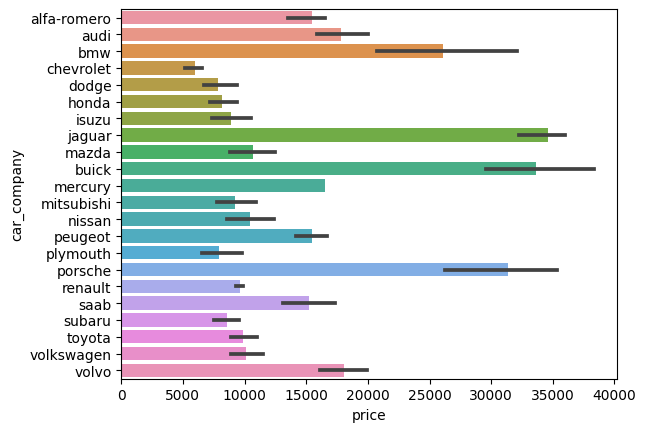

In [ ]:
sns.barplot(x='price',y='car_company',data=df)
plt.show()

from this plot bmw,jaguar,buick,porsche company cars buyed with high price.
chevrolet,subaru plymouth company cars buyed with low price.


<Axes: xlabel='cylindernumber', ylabel='price'>

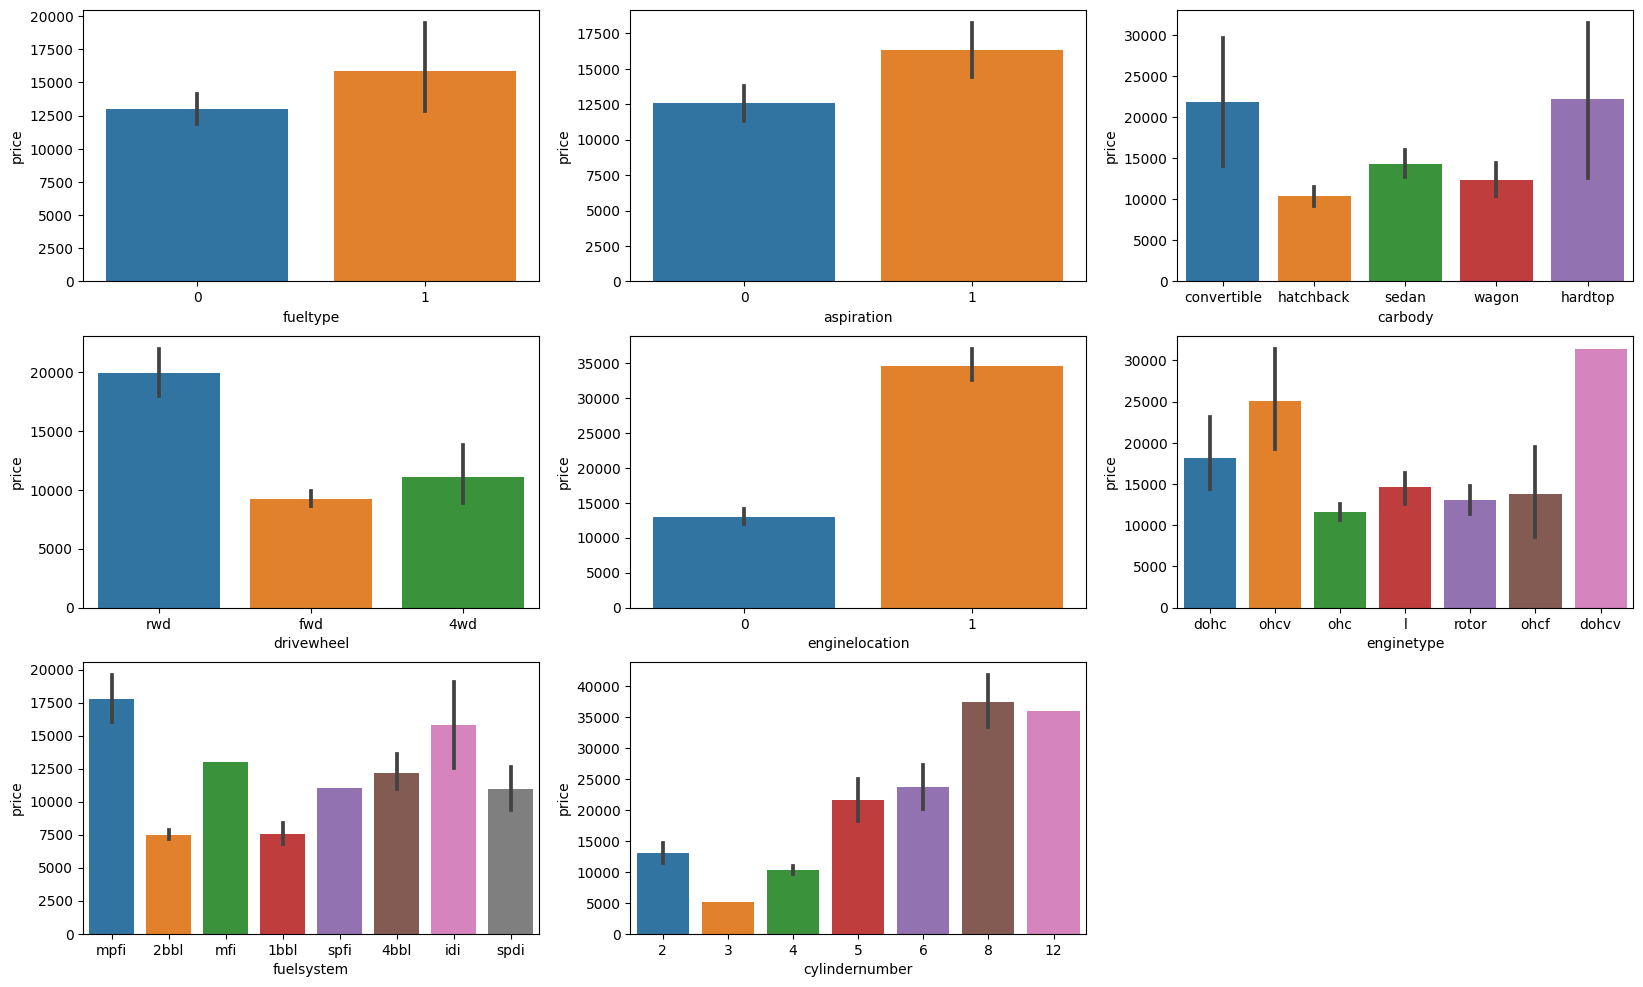

In [ ]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.barplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,2)
sns.barplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,3)
sns.barplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,4)
sns.barplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,3,5)
sns.barplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,3,6)
sns.barplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,7)
sns.barplot(x = 'fuelsystem', y = 'price', data = df)
plt.subplot(3,3,8)
sns.barplot(x='cylindernumber',y='price',data=df)

1.price of gas vehicles is lower than that of Diesel Vehicles
2.standard aspirated vehicles have a price lower than turbo aspirated vehicles
3.Hatchback vehicles have the lowest price of vehicles in the data set whereas hardtop vehicles have 
the highest price.
4.The price of vehicles with rear placed engines is significantly higher than the price of vehicles with front 
placed engines. 
5.The cost of eight cylinder vehicles is higher than other cylinder categories.
6.It is clear that vehicles Multi-port Fuel Injection [MPFI] fuelsystem have the highest price.
7.Vehicles with OHCV engine type falls under higher price range.
8.Vehicles with rwd type falls under higher price range.

<ipython-input-34-a2cf6363c5fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True ,cmap = 'YlGnBu')


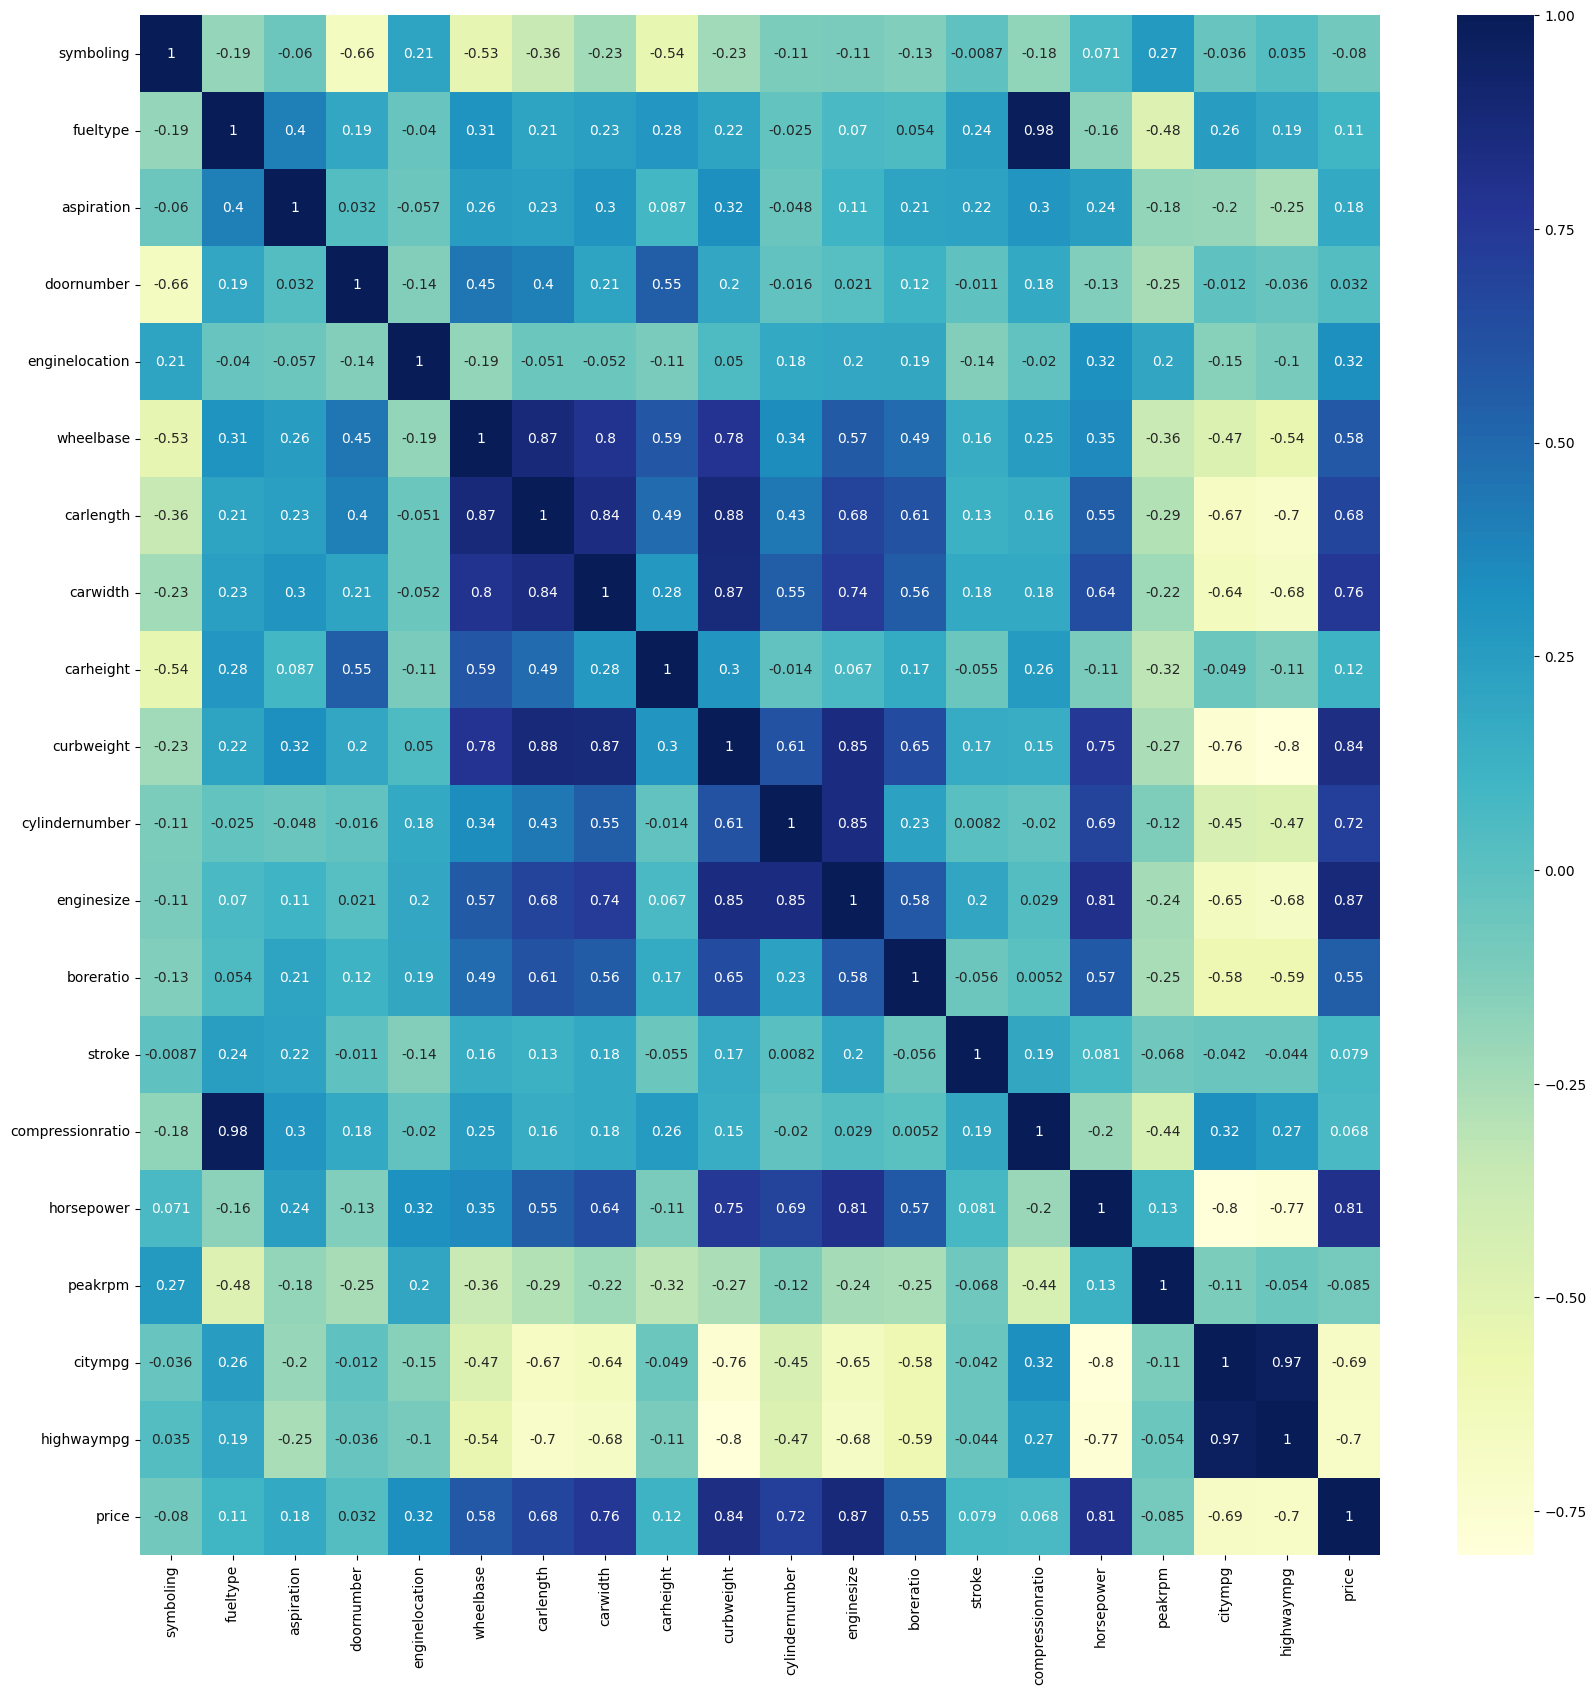

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower.

Price is negatively correlated to symboling, citympg and highwaympg.

This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower.

There are many independent variables which are highly correlated: wheelbase, carlength, curbweight, enginesize etc.. all are positively correlated.

In [ ]:
df.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.097561,0.180488,3.121951,0.014634,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,0.297446,0.385535,0.994966,0.120377,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,0.000000,0.000000,2.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,0.000000,0.000000,4.000000,0.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,0.000000,0.000000,4.000000,0.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,1.000000,1.000000,4.000000,1.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df=df.drop(['car_company'],axis=1)

In [ ]:
categorical_cols = df.select_dtypes(include = ['object'])
categorical_cols.head()

,carbody,drivewheel,enginetype,fuelsystem
0,convertible,rwd,dohc,mpfi
1,convertible,rwd,dohc,mpfi
2,hatchback,rwd,ohcv,mpfi
3,sedan,fwd,ohc,mpfi
4,sedan,4wd,ohc,mpfi


In [ ]:
cars_dummies = pd.get_dummies(categorical_cols, drop_first = True)
cars_dummies.head()

,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
car_df  = pd.concat([df, cars_dummies], axis =1)

In [ ]:
car_df = car_df.drop(['carbody', 'drivewheel','enginetype', 'fuelsystem'], axis =1)

In [ ]:
car_df

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,2,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,4,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,4,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,0,4,0,109.1,188.8,68.9,55.5,2952,...,0,0,0,0,0,0,0,0,0,1
201,-1,0,1,4,0,109.1,188.8,68.8,55.5,3049,...,0,0,0,0,0,0,0,0,0,1
202,-1,0,0,4,0,109.1,188.8,68.9,55.5,3012,...,0,0,0,0,0,0,0,0,0,1
203,-1,1,1,4,0,109.1,188.8,68.9,55.5,3217,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X=car_df.drop('price',axis='columns')
y=car_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=7)

In [ ]:
X.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=dt.predict(X_test)
y_pred

array([ 9279. ,  9538. ,  6095. , 16430. , 21105. , 24565. , 15510. ,
        7299. , 11248. ,  9295. ,  6189. ,  7299. ,  7957. , 14997.5,
        6795. ,  8058. ,  6229. , 14399. ,  8358. , 12764. ,  8195. ,
        7775. , 11248. , 40960. , 15250. , 16515. ,  9295. , 11900. ,
       13950. ,  7995. , 11395. , 17425. , 11595. ,  6989. , 33278. ,
       11248. , 23875. ,  9538. , 12764. , 11595. ,  6189. ])

In [ ]:
r2_score(y_test,y_pred)

0.7748323381905704

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40]:
  dt=DecisionTreeRegressor(max_depth=depth)
  dt.fit(X_train, y_train)
  trainAccuracy = r2_score(y_train, dt.predict(X_train))
  val=cross_val_score(dt,X_train,y_train,cv=10, scoring=make_scorer(r2_score))
  print('depth:',depth ,'train score:',trainAccuracy, 'cv score:',np.mean(val))

depth: 1 train score: 0.6798109461015329 cv score: 0.6042993203346394
depth: 2 train score: 0.8903304425982259 cv score: 0.8214826118712478
depth: 3 train score: 0.9332735754336278 cv score: 0.8593051207600284
depth: 4 train score: 0.9620822015197166 cv score: 0.8625534837430721
depth: 5 train score: 0.9765806407222741 cv score: 0.8457720893326384
depth: 6 train score: 0.9870729390749869 cv score: 0.8563713212946
depth: 7 train score: 0.9933573906883919 cv score: 0.8419746028733318
depth: 8 train score: 0.9953746503732076 cv score: 0.8477602315698867
depth: 9 train score: 0.9965500607868119 cv score: 0.8478223412880549
depth: 10 train score: 0.9978371451169906 cv score: 0.83681452306988
depth: 20 train score: 0.9985166791288094 cv score: 0.8330336985311787
depth: 30 train score: 0.9985166791288094 cv score: 0.8490735243142419
depth: 40 train score: 0.9985166791288094 cv score: 0.8458231398939958


In [ ]:
dt=DecisionTreeRegressor(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
y_pred9=dt.predict(X_test)

In [ ]:
r2_score(y_test,y_pred9)

0.7711281654028301

In [ ]:
importance=dt.feature_importances_
sorted(list(zip(importance,X_test.columns)),reverse=True)

[(0.7284155085883275, 'enginesize'),
 (0.24785024385266816, 'curbweight'),
 (0.013713411059407831, 'fueltype'),
 (0.008617756332714386, 'boreratio'),
 (0.0014030801668821963, 'wheelbase'),
 (0.0, 'symboling'),
 (0.0, 'stroke'),
 (0.0, 'peakrpm'),
 (0.0, 'horsepower'),
 (0.0, 'highwaympg'),
 (0.0, 'fuelsystem_spfi'),
 (0.0, 'fuelsystem_spdi'),
 (0.0, 'fuelsystem_mpfi'),
 (0.0, 'fuelsystem_mfi'),
 (0.0, 'fuelsystem_idi'),
 (0.0, 'fuelsystem_4bbl'),
 (0.0, 'fuelsystem_2bbl'),
 (0.0, 'enginetype_rotor'),
 (0.0, 'enginetype_ohcv'),
 (0.0, 'enginetype_ohcf'),
 (0.0, 'enginetype_ohc'),
 (0.0, 'enginetype_l'),
 (0.0, 'enginetype_dohcv'),
 (0.0, 'enginelocation'),
 (0.0, 'drivewheel_rwd'),
 (0.0, 'drivewheel_fwd'),
 (0.0, 'doornumber'),
 (0.0, 'cylindernumber'),
 (0.0, 'compressionratio'),
 (0.0, 'citympg'),
 (0.0, 'carwidth'),
 (0.0, 'carlength'),
 (0.0, 'carheight'),
 (0.0, 'carbody_wagon'),
 (0.0, 'carbody_sedan'),
 (0.0, 'carbody_hatchback'),
 (0.0, 'carbody_hardtop'),
 (0.0, 'aspiration')]

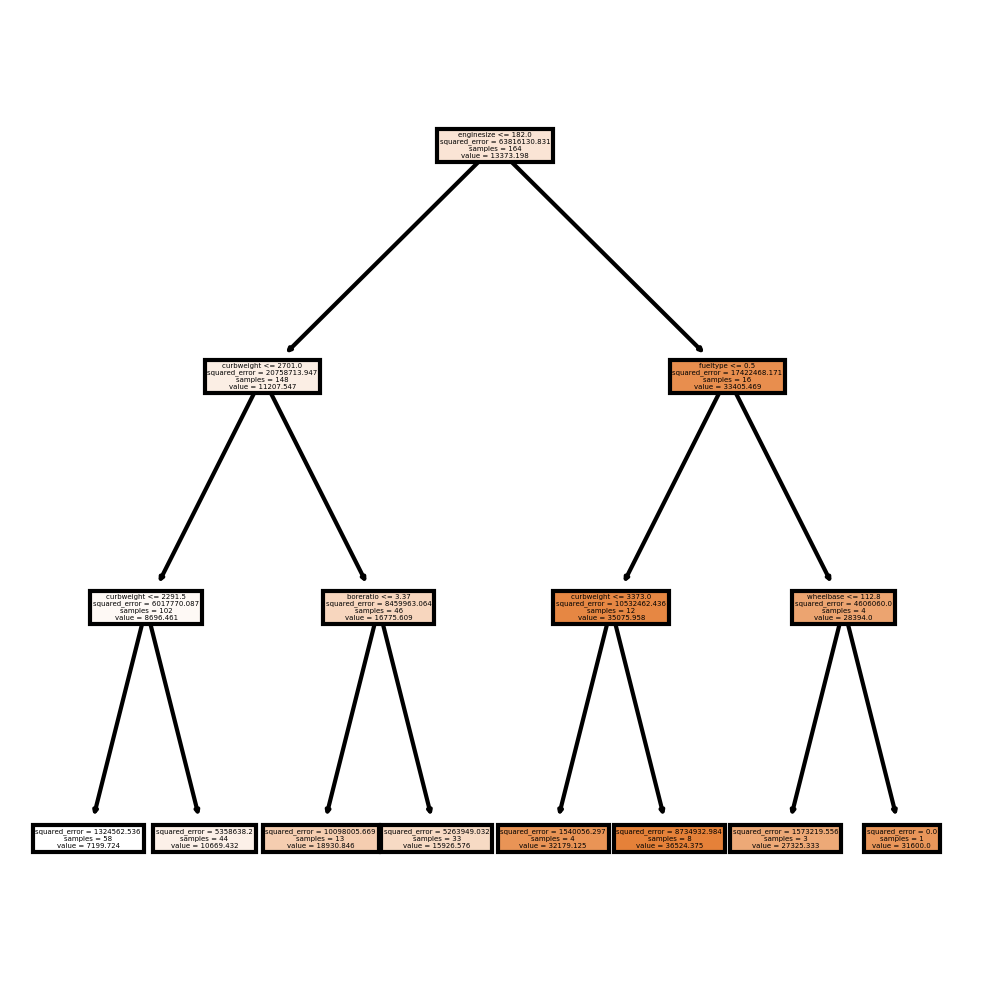

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree 

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = X_test.columns,
               filled = True);
fig.savefig('imagename.png')

# random forest

In [ ]:
X=car_df.drop('price',axis='columns')
y=car_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=7)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 5, max_features='sqrt')

In [ ]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt')

In [ ]:
y_pred=rf.predict(X_test)
y_pred

array([ 9828.55606397,  9634.14832749,  6530.26948527, 13423.33723786,
        9632.12687427, 17105.21413923, 16309.33864197,  6993.9233625 ,
       12514.54614531, 10507.81588568,  6552.16620832,  6885.95534448,
        7999.35820156, 14995.21937337,  6802.11989088,  7778.11053143,
        6616.561783  , 16804.85876227,  7435.72654343, 11217.79324712,
        8937.52981975,  8102.70977789, 10708.07034017, 36450.93368615,
       15800.19782884, 17010.47831242, 10765.27988021, 19337.39494112,
       11911.67608038,  8077.38537935, 12607.38800027, 16706.3605744 ,
        9944.17969542,  8865.61529661, 30390.72769914, 10540.86627302,
       19912.17777742,  9817.2960688 , 14220.12788763,  9461.88189879,
        7302.7815236 ])

In [ ]:
r2_score(y_test,y_pred)

0.8804394318747288

In [ ]:
importance=rf.feature_importances_
sorted(list(zip(importance,X_test.columns)),reverse=True)

[(0.14482737136335255, 'enginesize'),
 (0.115212916537755, 'cylindernumber'),
 (0.10985201798367666, 'curbweight'),
 (0.10839461824447147, 'horsepower'),
 (0.0964183487543926, 'highwaympg'),
 (0.09089837831295633, 'carwidth'),
 (0.08806056809611029, 'citympg'),
 (0.058029978854793864, 'carlength'),
 (0.031381028755231945, 'boreratio'),
 (0.026444587189759568, 'drivewheel_fwd'),
 (0.024262630199733036, 'drivewheel_rwd'),
 (0.020458784250773066, 'wheelbase'),
 (0.012294822465700588, 'peakrpm'),
 (0.011394193501593321, 'compressionratio'),
 (0.010322423010236422, 'stroke'),
 (0.008825480399607283, 'fuelsystem_2bbl'),
 (0.008256709237808687, 'carheight'),
 (0.005259503823085484, 'fuelsystem_mpfi'),
 (0.004939697617429859, 'enginelocation'),
 (0.0032509383703186495, 'enginetype_ohc'),
 (0.002836488101249804, 'symboling'),
 (0.002610784893085787, 'aspiration'),
 (0.0025000966081745947, 'carbody_hardtop'),
 (0.002399507049452398, 'carbody_sedan'),
 (0.0022517633993261914, 'enginetype_ohcv'),


xg boost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,accuracy_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  
  print("Learning rate : ", lr, " Train score : ", r2_score(y_train,model.predict(X_train)), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10,scoring=make_scorer(r2_score))))

Learning rate :  0.01  Train score :  0.3836461358776897  Cross-Val score :  0.27986860339340036
Learning rate :  0.02  Train score :  0.882860216536387  Cross-Val score :  0.8029187660608601
Learning rate :  0.03  Train score :  0.972135085674888  Cross-Val score :  0.8929643478024142
Learning rate :  0.04  Train score :  0.9909018818410207  Cross-Val score :  0.9115737933570044
Learning rate :  0.05  Train score :  0.9954840798974145  Cross-Val score :  0.9128312385671535
Learning rate :  0.06  Train score :  0.997017185775377  Cross-Val score :  0.9138675674617687
Learning rate :  0.07  Train score :  0.9975925939993167  Cross-Val score :  0.9198324450005329
Learning rate :  0.08  Train score :  0.9978255299619522  Cross-Val score :  0.907904637340927
Learning rate :  0.09  Train score :  0.9979711757182527  Cross-Val score :  0.9120635737564828
Learning rate :  0.1  Train score :  0.9981875198937553  Cross-Val score :  0.910635405995469
Learning rate :  0.11  Train score :  0.99825

In [ ]:
model = xgb.XGBRegressor(learning_rate = 0.11, n_estimators=100)
model.fit(X_train,y_train) #train the model
y_pred=model.predict(X_test)
r2_score(y_test,y_pred) # scoring the model - r2 squared

0.9066912302658299